(-0.2, 0.2)

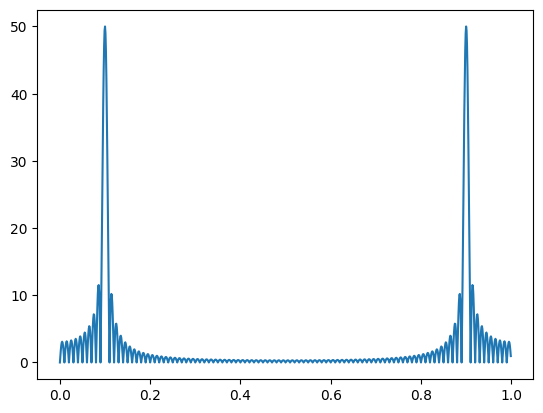

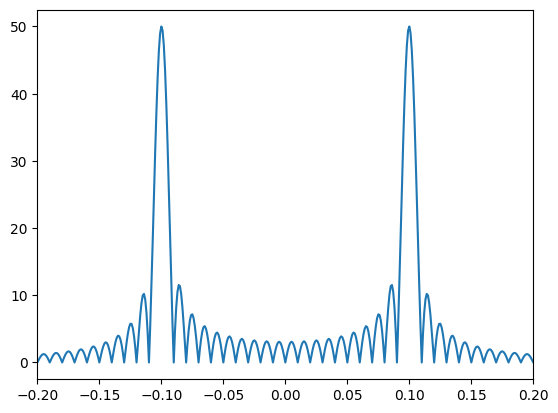

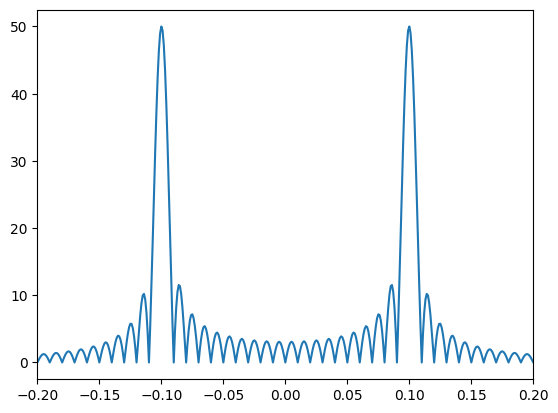

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft
from scipy.signal.windows import blackman, hamming, hann
from scipy.fft import fft

duree_signal=100
duree_avec_padding=1000
signal=np.sin(2*np.pi*0.1*np.arange(100))
signal_padde=np.concatenate((signal,np.zeros(duree_avec_padding-duree_signal)))
plt.figure(1)
f=np.arange(duree_avec_padding)/duree_avec_padding
plt.plot(f,np.abs(fft(signal_padde)))
plt.figure(2)
plt.plot(f-1/2,np.abs(np.fft.fftshift(fft(signal_padde))))
plt.xlim([-0.2 , 0.2])
# NB : l’ajout de zeros à un signal, pour augmenter la résolution fréquentielle
# de la TFD, peut être simulé sns explicitement ajouter des 0
plt.figure(3)
plt.plot(f-1/2,abs(np.fft.fftshift(fft(signal,duree_avec_padding))))
plt.xlim([-0.2 , 0.2])


L'idée est d'obtenir une vue plus détaillée et plus précise des fréquences composant de notre signal original. En ajoutant du padding, on ne change pas le signal mais on etire l'espace fréquentiel pour voir plus clairement les différentes fréquences. 

## Exercice 1 – Propriétés des fenêtres spectrales

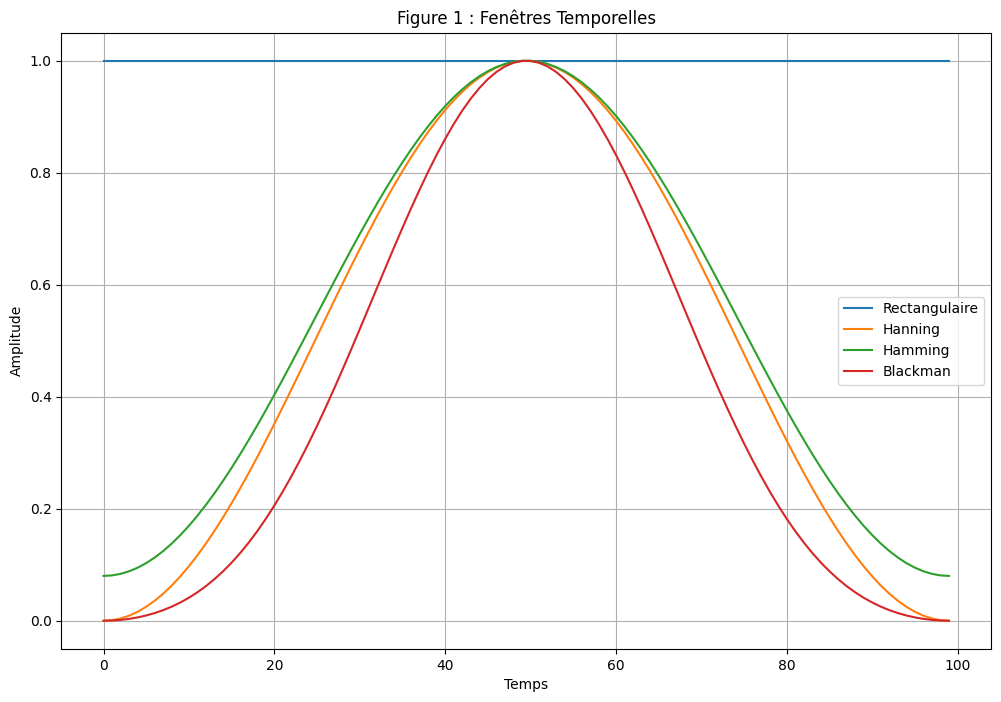

In [10]:
K = 100  # Nombre de points dans chaque fenêtre
N = 1000  # Nombre de points pour la FFT

# Création des fenêtres
fenetre_rectangulaire = np.ones(K)
fenetre_hanning = hann(K)
fenetre_hamming = hamming(K)
fenetre_blackman = blackman(K)

# Création du dictionnaire des signaux avec toutes les fenêtres définies
signaux = {
    "Rectangulaire": fenetre_rectangulaire,
    "Hanning": fenetre_hanning,
    "Hamming": fenetre_hamming,
    "Blackman": fenetre_blackman
}

# Temps ou index de la fenêtre
temps = np.arange(K)

# Affichage des différentes fenêtres
plt.figure(figsize=(12, 8))
for nom, signal_fenetre in signaux.items():
    plt.plot(temps, signal_fenetre, label=nom)
plt.title("Figure 1 : Fenêtres Temporelles")
plt.xlabel("Temps")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()

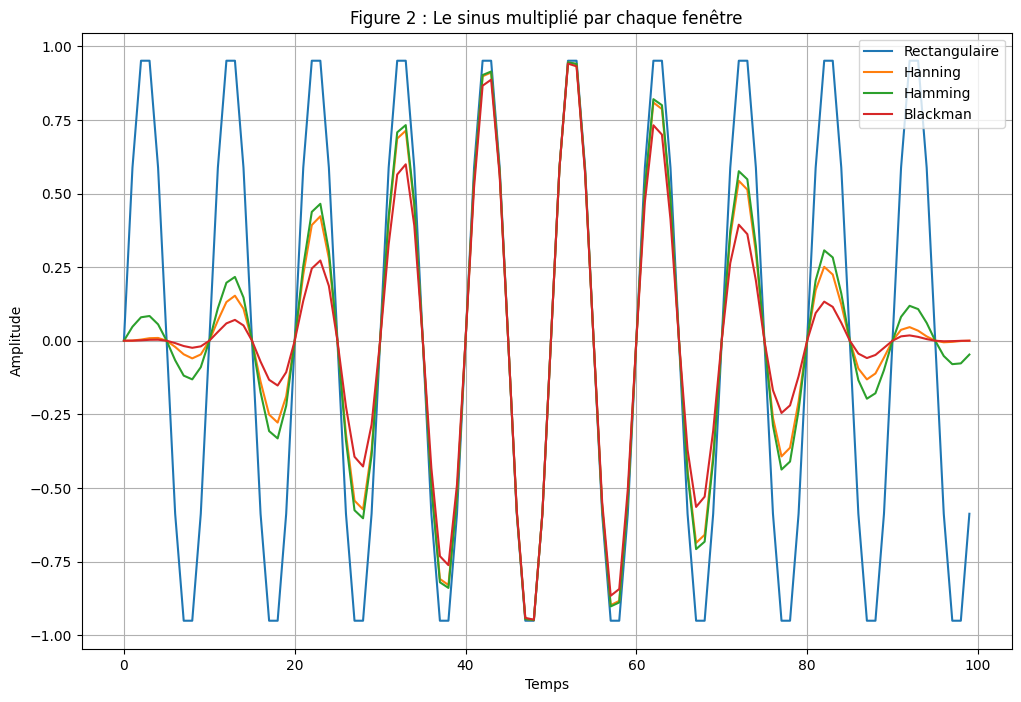

In [11]:
# J'utiliserai le signal sinus qui a été donné au debut du code
signal_sinus = np.sin(2 * np.pi * 0.1 * np.arange(K))

plt.figure(figsize=(12, 8))
for nom, fenetre in signaux.items():
    plt.plot(temps, signal_sinus * fenetre, label=nom)
plt.title("Figure 2 : Le sinus multiplié par chaque fenêtre")
plt.xlabel("Temps")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()


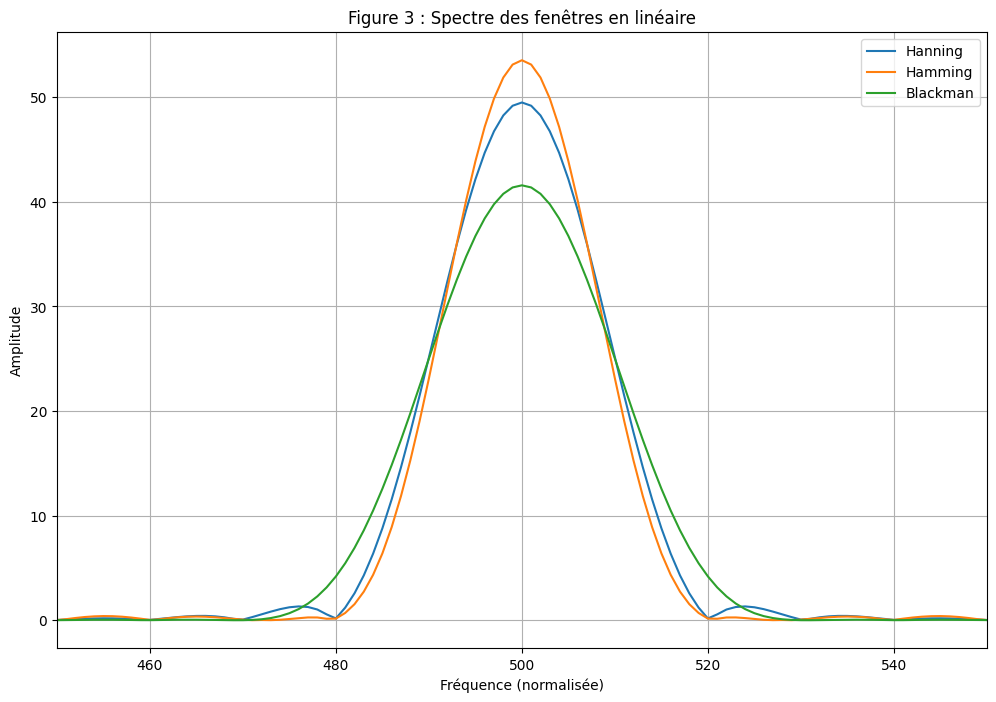

In [12]:
# Ici je vais comparer les spectres de chacune des fenêtres en linéaire sur N = 1000 points
x = np.arange(1000)
plt.figure(figsize=(12, 8))
plt.plot(x, np.abs(np.fft.fftshift(fft(fenetre_hanning, 1000))), label="Hanning")
plt.plot(x, np.abs(np.fft.fftshift(fft(fenetre_hamming, 1000))), label="Hamming")
plt.plot(x, np.abs(np.fft.fftshift(fft(fenetre_blackman, 1000))), label="Blackman")
plt.title("Figure 3 : Spectre des fenêtres en linéaire")
plt.xlabel('Fréquence (normalisée)')
plt.ylabel('Amplitude')
plt.xlim([450, 550])
plt.legend()
plt.grid(True)
plt.show()

C:\Users\konta\AppData\Local\Temp\ipykernel_4248\3407408609.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.plot(x, 20 * np.log10(np.abs(np.fft.fftshift(fft(fenetre_hanning, 1000)))), label="Hanning")
C:\Users\konta\AppData\Local\Temp\ipykernel_4248\3407408609.py:4: RuntimeWarning: divide by zero encountered in log10
  plt.plot(x, 20 * np.log10(np.abs(np.fft.fftshift(fft(fenetre_hamming, 1000)))), label="Hamming")
C:\Users\konta\AppData\Local\Temp\ipykernel_4248\3407408609.py:5: RuntimeWarning: divide by zero encountered in log10
  plt.plot(x, 20 * np.log10(np.abs(np.fft.fftshift(fft(fenetre_blackman, 1000)))), label="Blackman")


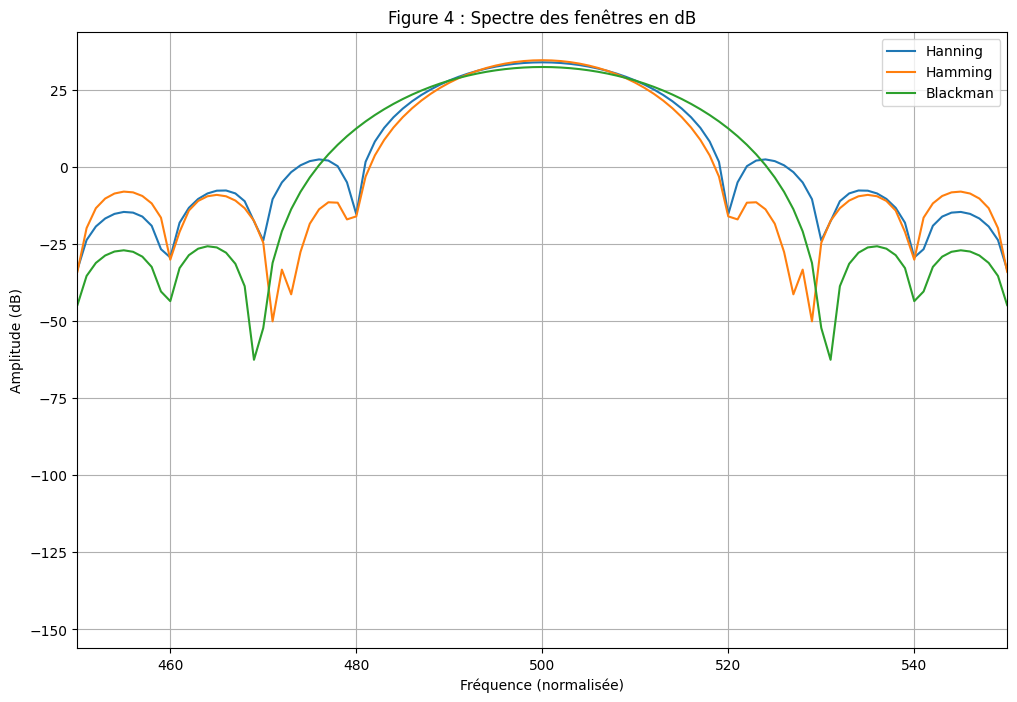

In [13]:
# Affichage du même résultat sur une échelle en dB
plt.figure(figsize=(12, 8))
plt.plot(x, 20 * np.log10(np.abs(np.fft.fftshift(fft(fenetre_hanning, 1000)))), label="Hanning")
plt.plot(x, 20 * np.log10(np.abs(np.fft.fftshift(fft(fenetre_hamming, 1000)))), label="Hamming")
plt.plot(x, 20 * np.log10(np.abs(np.fft.fftshift(fft(fenetre_blackman, 1000)))), label="Blackman")
plt.title("Figure 4 : Spectre des fenêtres en dB")
plt.xlabel('Fréquence (normalisée)')
plt.ylabel('Amplitude (dB)')
plt.xlim([450, 550])
plt.legend()
plt.grid(True)
plt.show()

In [14]:
# Fonction pour calculer les paramètres du spectre d'une fenêtre
def calcule_spectre_parametres(fenetre_fft, N):
    fft_abs = np.abs(fenetre_fft)
    peak = np.max(fft_abs)
    lobe_largeur = np.sum(fft_abs > (peak / 2)) / N
    attenuation = 20 * np.log10(peak / (np.sort(fft_abs)[-2]))
    return lobe_largeur, attenuation

parametres_fenetres = {}

for nom, fenetre in signaux.items():
    fenetre_fft = np.fft.fft(fenetre, N)
    fenetre_fft_shifted = np.fft.fftshift(fenetre_fft)
    lobe_largeur, attenuation = calcule_spectre_parametres(fenetre_fft_shifted, N)
    puissance = np.sum(fenetre**2)
    parametres_fenetres[nom] = {
        'Largeur du lobe principal': lobe_largeur,
        'Atténuation en dB': attenuation,
        'Puissance sous la fenêtre': puissance
    }
parametres_fenetres

{'Rectangulaire': {'Largeur du lobe principal': 0.013,
  'Atténuation en dB': 0.14333588444141188,
  'Puissance sous la fenêtre': 100.0},
 'Hanning': {'Largeur du lobe principal': 0.021,
  'Atténuation en dB': 0.05493788327618089,
  'Puissance sous la fenêtre': 37.125},
 'Hamming': {'Largeur du lobe principal': 0.019,
  'Atténuation en dB': 0.06808936648844034,
  'Puissance sous la fenêtre': 39.349},
 'Blackman': {'Largeur du lobe principal': 0.023,
  'Atténuation en dB': 0.042755076116443295,
  'Puissance sous la fenêtre': 30.155399999999997}}

Fenêtre Rectangulaire :
    //Largeur du lobe principal : 0.013
    //Atténuation en dB : 0.14 dB
    //Puissance sous la fenêtre : 100.0

Fenêtre Hanning :
    //Largeur du lobe principal : 0.021
    //Atténuation en dB : 0.05 dB
    //Puissance sous la fenêtre : 37.13

Fenêtre Hamming :
    //Largeur du lobe principal : 0.019
    //Atténuation en dB : 0.07 dB
    //Puissance sous la fenêtre : 39.35

Fenêtre Blackman :
    //Largeur du lobe principal : 0.023
    //Atténuation en dB : 0.04 dB
    //Puissance sous la fenêtre : 30.16

## Exercice 2 – Influence des différentes fenêtres sur la résolution fréquentielle de la TFD

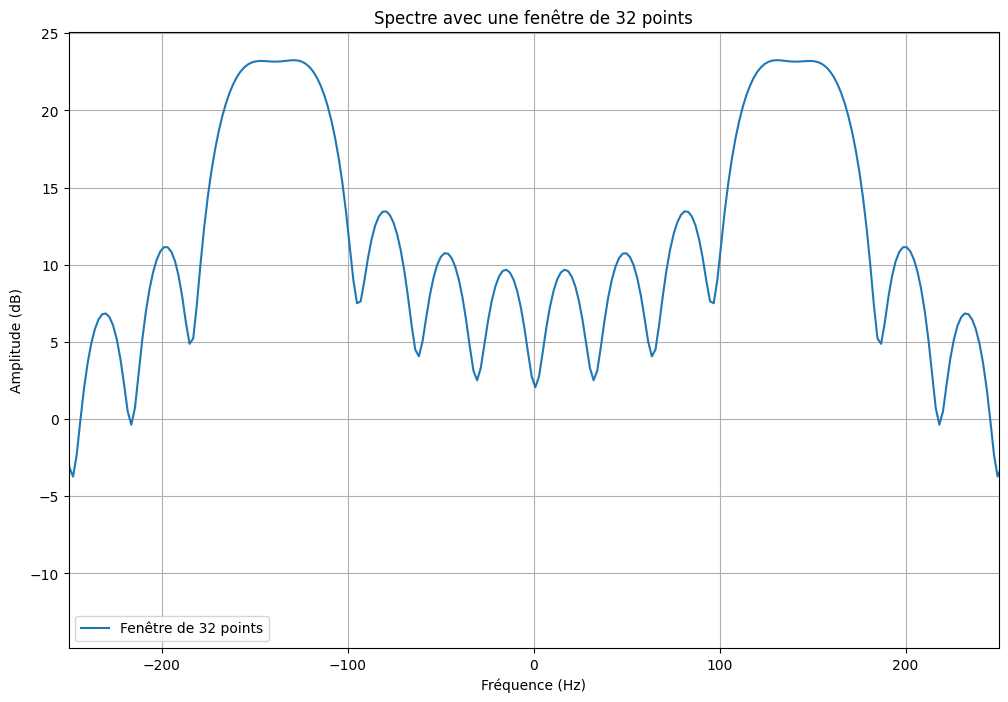

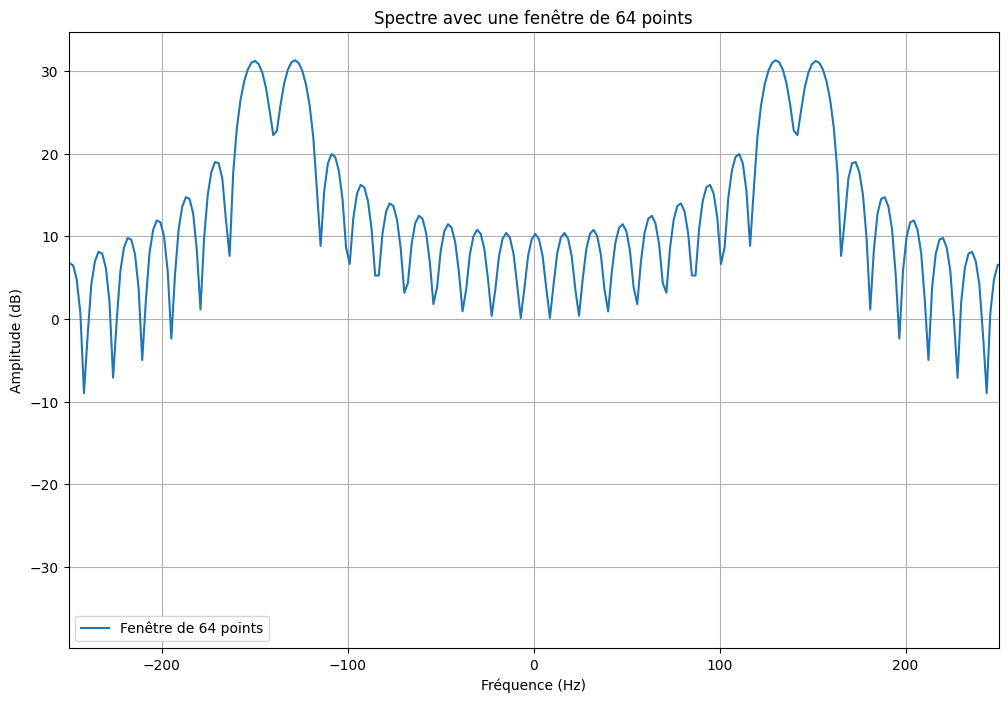

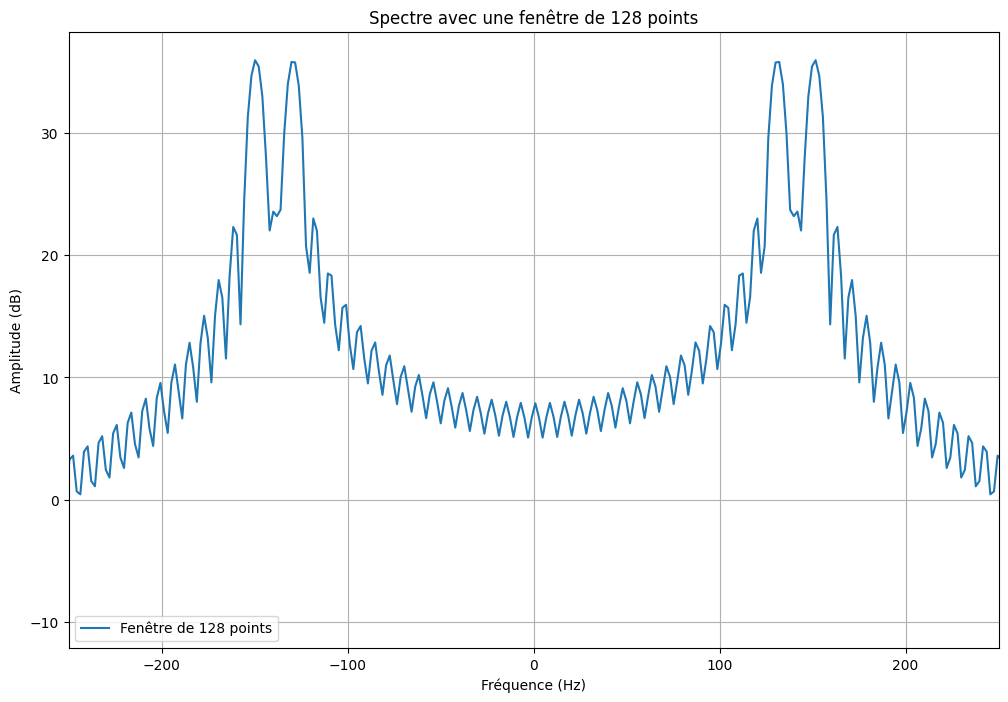

In [15]:

fe = 1000 
f1, f2 = 130, 150  
t = np.arange(0, 0.128, 1/fe) 
signal_composite = np.sin(2 * np.pi * f1 * t) + np.sin(2 * np.pi * f2 * t)

longueurs = [32, 64, 128]
for longueur in longueurs:
    signal_limite = signal_composite[:longueur]
    spectre = np.fft.fft(signal_limite, 512)
    spectre_decale = np.fft.fftshift(spectre)
    amplitude_db = 20 * np.log10(np.abs(spectre_decale))
    
    plt.figure(figsize=(12, 8))
    f = np.linspace(0, fe, 512)
    plt.plot(f - fe/2, amplitude_db, label=f'Fenêtre de {longueur} points')
    plt.title(f'Spectre avec une fenêtre de {longueur} points')
    plt.xlabel('Fréquence (Hz)')
    plt.ylabel('Amplitude (dB)')
    plt.xlim([-fe/4, fe/4])
    plt.legend()
    plt.grid(True)
    plt.show()

Avec une fenêtre de 32 points, les deux pics à 130 Hz et 150 Hz ne sont pas clairement séparés en raison de la largeur de bande plus élevée des lobes principaux.

En augmentant la longueur de la fenêtre à 64 points, les pics commencent à être plus distincts.

Avec une fenêtre de 128 points les deux pics sont clairement séparés et distincts.

 La modification de la durée du signal en prenant une fenêtre plus longue permet d'obtenir une meilleure définition du spectre a cause de la reduction de la largeur de bande des lobes principaux alors on résouds plus facilement les fréquences proches les unes des autres.

## Exercice 3 – Influence des différentes fenêtres sur la résolution en amplitude de la TFD

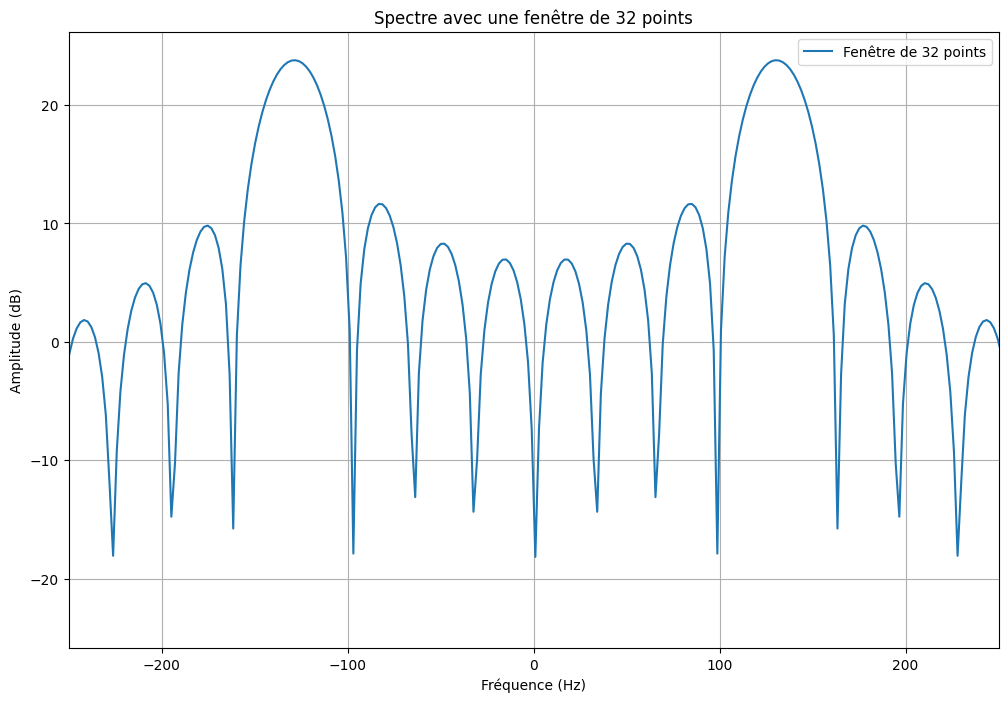

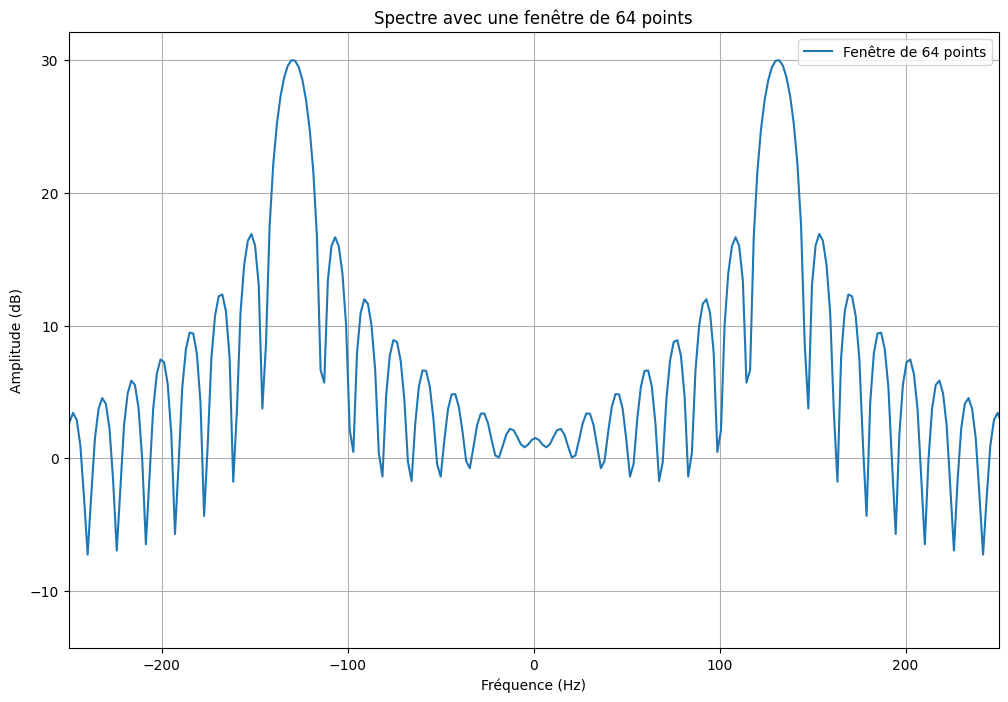

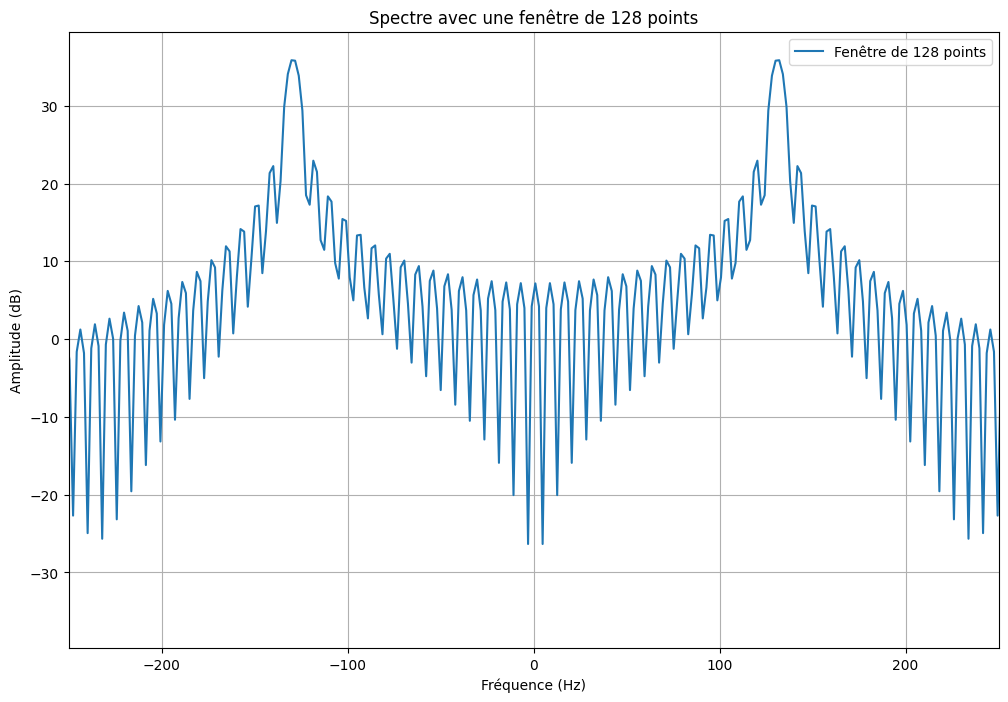

In [16]:
amp1, amp2 = 1, 1/100
f1, f2 = 130, 300
signal_composite_amp = amp1 * np.sin(2 * np.pi * f1 * t) + amp2 * np.sin(2 * np.pi * f2 * t)

def generer_et_afficher_spectres(signal, longueurs, fe):
    for longueur in longueurs:
        signal_limite = signal[:longueur]
        spectre = np.fft.fft(signal_limite, 512)
        spectre_decale = np.fft.fftshift(spectre)
        amplitude_db = 20 * np.log10(np.abs(spectre_decale))

        plt.figure(figsize=(12, 8))
        f = np.linspace(0, fe, 512)
        plt.plot(f - fe/2, amplitude_db, label=f'Fenêtre de {longueur} points')
        plt.title(f'Spectre avec une fenêtre de {longueur} points')
        plt.xlabel('Fréquence (Hz)')
        plt.ylabel('Amplitude (dB)')
        plt.xlim([-fe/4, fe/4])
        plt.legend()
        plt.grid(True)
        plt.show()

generer_et_afficher_spectres(signal_composite_amp, longueurs, fe)

Avec une fenêtre de 32 points le pic à 300 Hz n'est pas facile a detecter a cause de son amplitude beaucoup plus faible par rapport au pic à 130 Hz.

Lorsque la longueur de la fenêtre passe à 64 points le pic à 300 Hz devient un peu plus visible malgré le fait que son amplitude soit très faible comparée à celle du pic à 130 Hz.

Avec une fenêtre de 128 points le pic à 300 Hz est plus visible.

La fenêtre de 128 points offre le meilleur équilibre pour notre signal, en permettant de de distinguer à la fois la fréquence et l'amplitude des composantes. 